# Data Science blog S01: Introduction to Linear Regression

In [1]:
from IPython.display import HTML, Image
%config InlineBackend.figure_format = 'svg'

In [2]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The Python code is hidden for easy reading. To view it click <a href="javascript:code_toggle()">here</a>

The purpose of this initiative is to raise awareness on how data science practices leverage data to solve real life problems. The tutorials will keep the programming part to the minimum required level. Those tutorials can be followed by both beginners and more experienced individuals.

## Contents

1. [What is Linear Regression?](#section1).
2. [How do we measure how good the regression line is?](#section2).
3. [How do we choose the coefficients of linear regression?](#section3).
4. [Implementation of Linear Regression in Python?](#section4).
5. [Fitting the Linear Regression model](#section5).
6. [Interpetation of the results](#section6).



<a id='section1'></a>

### 0.1 What is Linear Regression?

Linear Regression is a machine learning algorithm based on [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning). There are two important terms in the previous sentence. The first is **regression**. Regression is the task of predicting a continuous variable(price, weight, emissions) from a set of input variables. **Supervised learning** means that the algorithms are learning by example. That means that we train an alogorithm to map an input to an ouput. For example: a) A person who weights(input) 80 kgs has height(output) of 1.80 m. b) A house with 4 rooms (input) worths(output) 2M DKK. In both examples (a) and (b) we have a set of inputs (weight, # of rooms)  which is mapped to a set of outputs(height, worth of the house). The value that we want to predict (output) is called the Dependent Variable whilst the predictors (input) are called independent variable.

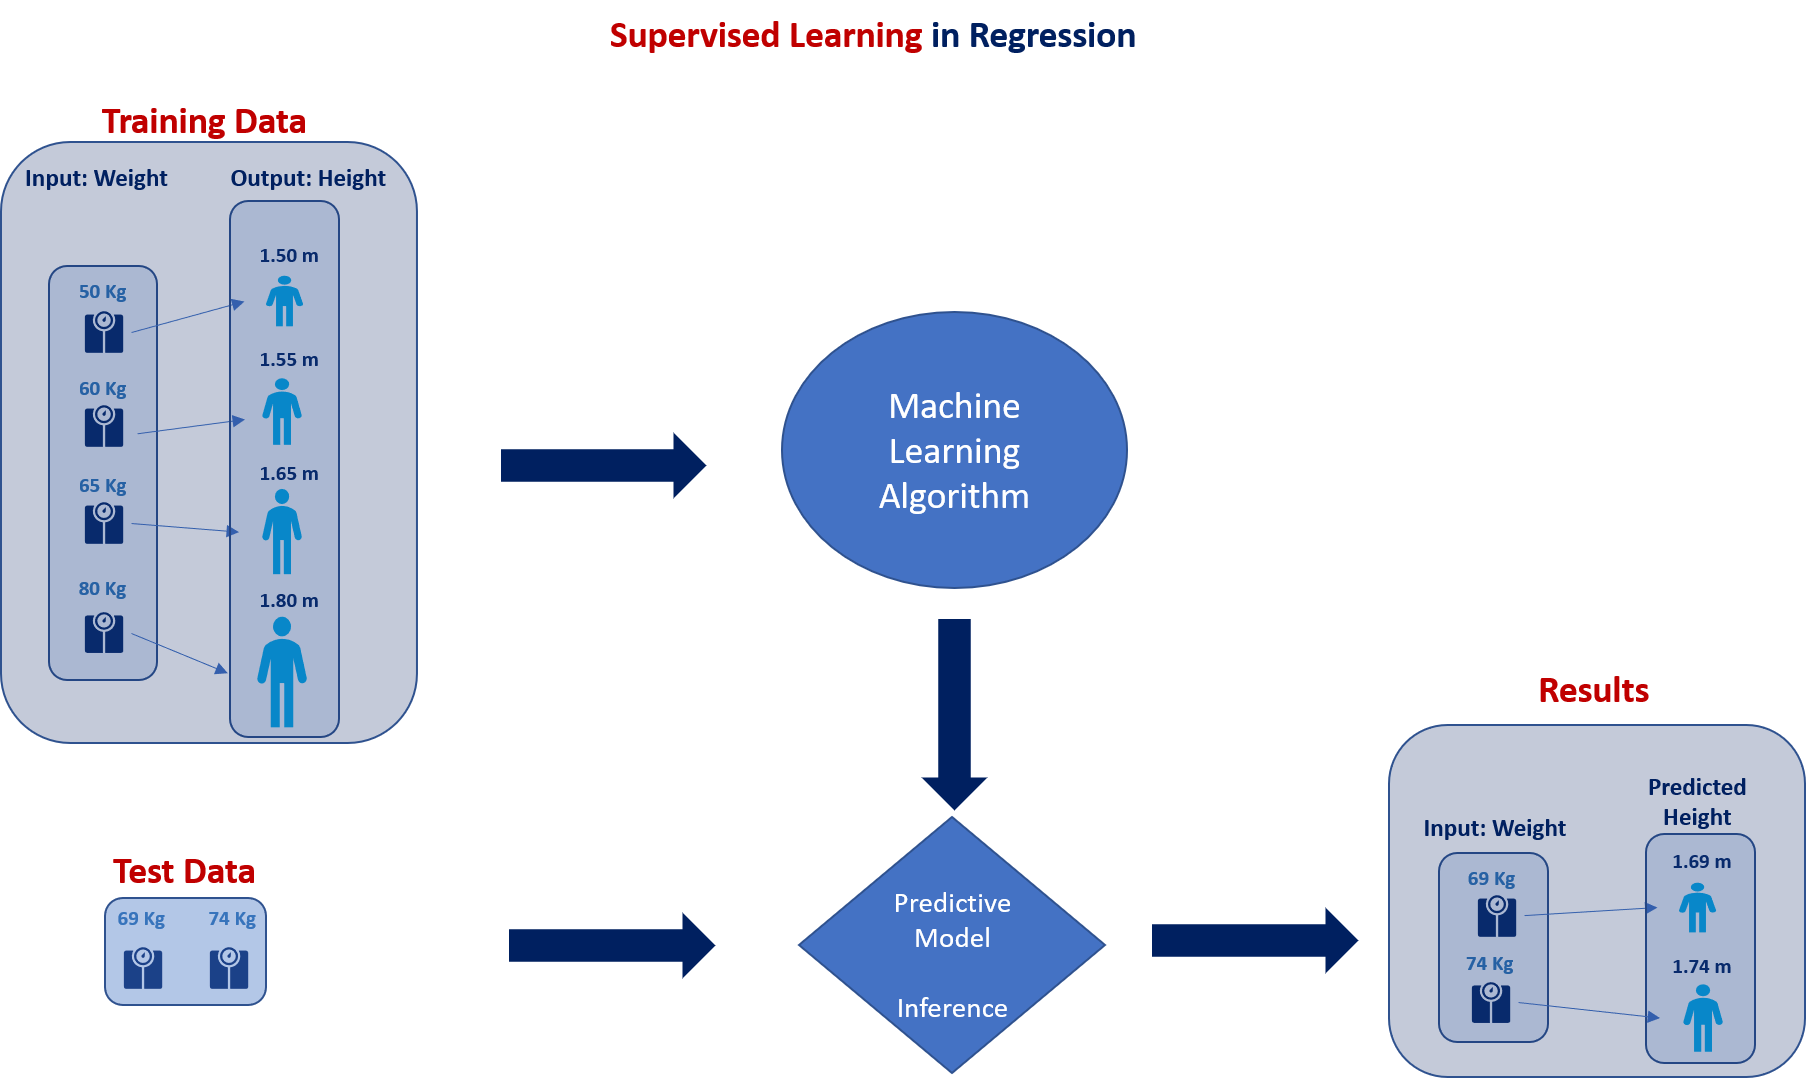

In [3]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\supervised.png')

Mathematically, the simple Linear Regression assumes only one input predictor (i.e only height ) and can be described by the following equation:




\begin{equation*}
y = \beta_{1}x_{1} + \beta_{0}
\label{eq_linreg} \tag{1}
\end{equation*}

The terms in eq. \eqref{eq_linreg} are:

* $y:$ Predicted Value
* $x_{1}:$ Predictor
* $\beta_{1}:$ Coefficient that determines how a unit change in $x_{1}$ affects a unit change  in $y$. It is also called the slope of the regression line.
* $\beta_{0}:$ Is the intercept of the regression line; that is the predicted value when $x_{1} = 0$.

To build some intuition behind this equation we will put it into context. The figure below contains three lines which we built using \eqref{eq_linreg}. For all the three lines the input data $x_{1} = [0,1,2,3,4,5]$.

<ol>
<li>For the blue line, we choose $\beta_{0} = 0$ and $\beta_{1} = 1$. By replacing those values in the equation we get  $y = 1*x_{1} + 0 \rightarrow y=x_{1}$. Naturally, $y = [0,1,2,3,4,5]$ for every $x_{1} = [0,1,2,3,4,5]$   </li> <br />
    
<li>For the orange line, we choose $\beta_{0} = 4$ and $\beta_{1} = -2$. By replacing those values in the equation we get  $y = -2x_{1} + 4$. Therefore, $y = [4,2,0,-2,-4,-6]$ for every $x_{1} = [0,1,2,3,4,5]$</li> <br />

<li>Finally, For the gray line, we choose $\beta_{0} = 2$ and $\beta_{3} = -2$. By replacing those values in the equation we get  $y = 3x_{1} + 2$. Therefore, $y = [2,5,8,1,14,17]$ for every $x_{1} = [0,1,2,3,4,5]$</li>
</ol>




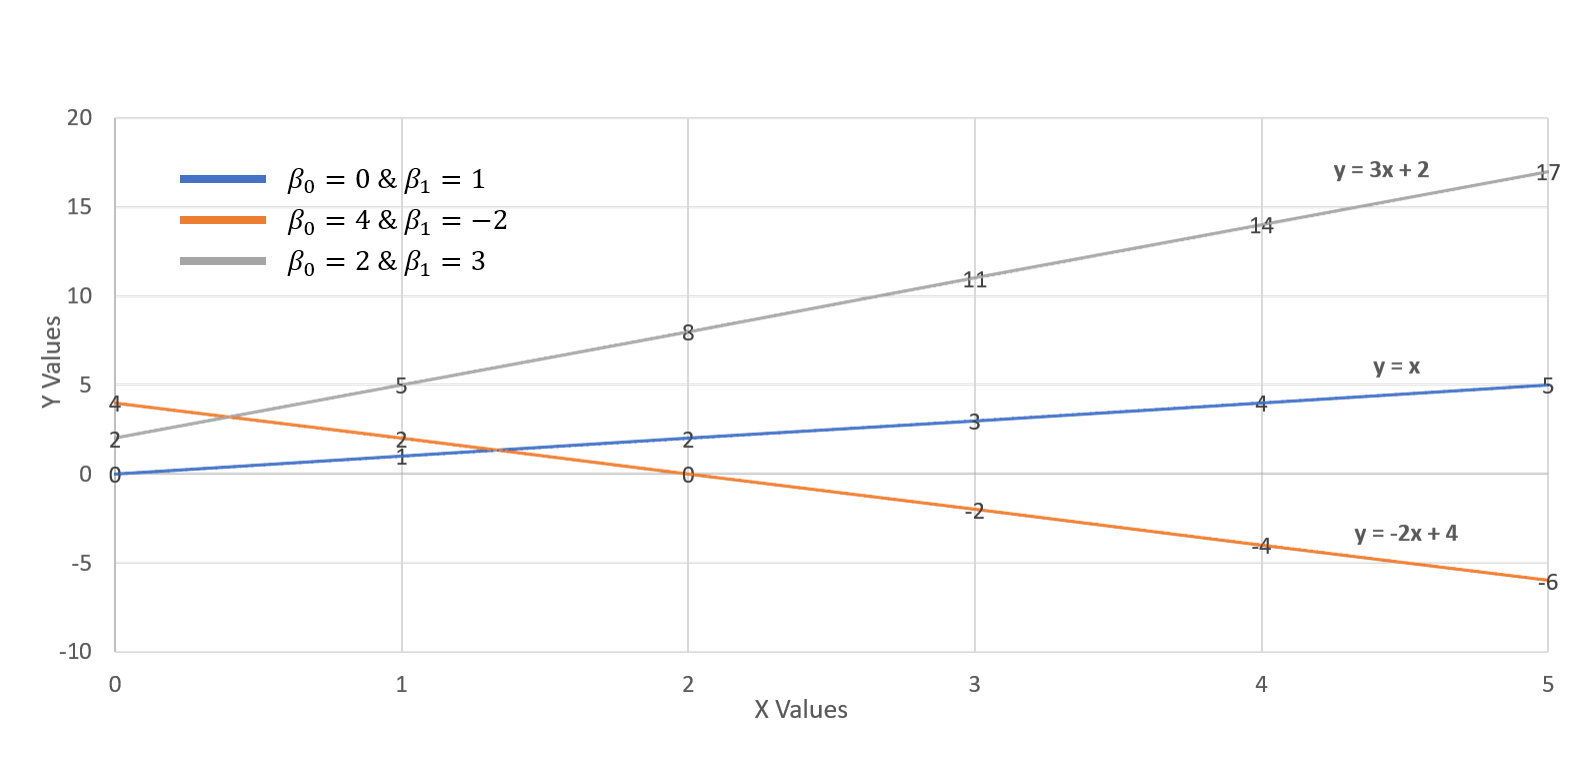

In [4]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\regression.png')

We see from the figure above, that for every $x_{1} = 0$, $y$ takes the value of $\beta_{0}$. Secondly, the direction of the line depends on the sign of $\beta_{1}$. Lastly and most important, what we need to remeber from the above example is that for the same $x_{1}$ values, the direction and values of the regression line are determined by the coefficients $\beta_{0}$ & $\beta_{1}$.

<a id='section2'></a>

### 02. How do we measure how good the regression line is?
Let us assume that we have the pair of training data $X = [x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7}, x_{8}]$ which maps to an output $Y = [y_{1}, y_{2}, y_{3}, y_{4}, y_{5}, y_{6}, y_{7}, y_{8}]$. For this pair of data, we need to find the regression line that best fits these data. A measure of how good the the regression line is, is the Mean Squared Error (MSE). Looking at Case 1 in the figure below we see that the regression line has a constant value of $y=4$. That is, because we chose the slope $\beta_{1} = 0$ &  $\beta_{0} = 4$. To measure the error we take the difference of the $y$ value of each point and the $y$ value of the regression line. Therefore, for the first point $y_{1}$ the error is $\epsilon_{1} = y_{1}-y$. In the same manner, the error for the rest of the points will be $\epsilon_{2},\epsilon_{3},\epsilon_{4},\epsilon_{5},\epsilon_{6},\epsilon_{7}, \epsilon_{8}$. Naturally, one would advocate that then total error of the regression will be given by $Sum_{error} = \epsilon_{1}+\epsilon_{2}+\epsilon_{3}+\epsilon_{4}+\epsilon_{5}+\epsilon_{6}+\epsilon_{7}+ \epsilon_{8}$. That does not stand true through. The individual errors can either take a positive or a negative value. For example, for $y_{3}= 3$ then $\epsilon_{3} = y_{3}-y = 3-4 = -1 $. When we sum over all the error, it is possible that we get a small values becuase of the negative values cancelling out the positive values. We deal with this issue by squaring each individual before summing. That said, the total error would be $$Sum_{error}^{2} =\epsilon_{1}^{2} +\epsilon_{2}^{2} +\epsilon_{3}^{2} +\epsilon_{4}^{2} +\epsilon_{5}^{2} +\epsilon_{6}^{2} +\epsilon_{7}^{2} + \epsilon_{8}^{2}$$ 

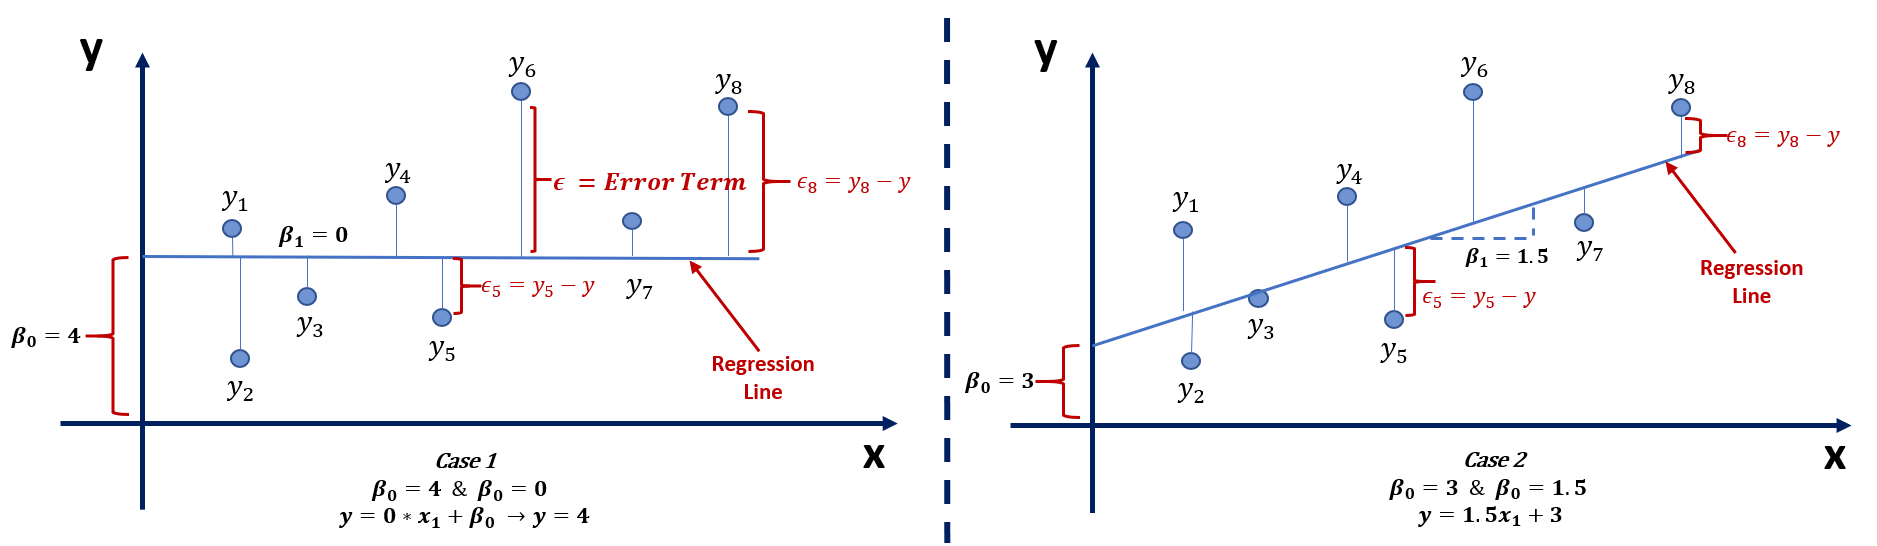

In [5]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\regression_error.png')

The regression lines from the two cases above have different regression errors. Visually we see that the regression line in case 2, fits the data better than the regression line in Case 1. That means which res that we chose better $\beta_{0}$ & $\beta_{1}$ parameters for Case 2 than Case 1 which resulted in a better fit and therefore in a lower $Sum_{error}^{2}$. To put it briefly, the objective of Linear Regression is to find the $\beta_{0}$ & $\beta_{1}$ coefficients that minimizes the $Sum_{error}^{2}$ on a set of training data. 

<a id='section3'></a>

### 03. How do we choose the coefficients of linear regression?
In Machine Learning we choose the coefficients numerically. That means that due to computational cost, we have a computer finding those parameters for us. The way the computer finds the best parameters is through a process called [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.). Since the concept can be mathemetically heavy and overwhelming, we will just build some intuition behind the process. Gradient Descent consists of two terms. Gradient, which means slope and Descent which means goes down. We look at the figure below to understand what happens on the surface of gradient descent. We mentioned earlier that the error of the linear regression depends on the parameters $\beta_{0}$  $\beta_{1}$ of the line that fits the data. For simplicity, lets us assume that the error only depends on the coefficient $\beta_{1}$ as in the figure below. The different values of $\beta_{1}$ gives differnt values of the error and thus can be viewed as the curve below. Here comes into play the gradient descent. The algorithm makes a random guess of what $\beta_{1}$ could be. That is the point p1. We see that at point p1 the slope is quite steep and has a large value. The 'Descent' part indicates that we should search for points where the slope is smaller. The the algorithm tries point p2. We calculate the slop for this point and we see that it is smaller than what it was in p1. The algorithm now know that it took the correct decision to choose a value towards that direction. Nevertheless the slope is still steep. On the third trial, the algorithm tries point p3. At this point the algorithm finds a point where the slope is almost horizontal or that it has value close to zero. We also see that at p1 where the slope is almost zero, we also have the small error. Therefore, the algorthm will pick the value of the coefficient $\beta_{1}$ at point p3 as the one that gives the smallest error. The Gradient Descent algorithm can be extended for any number of parameters. 

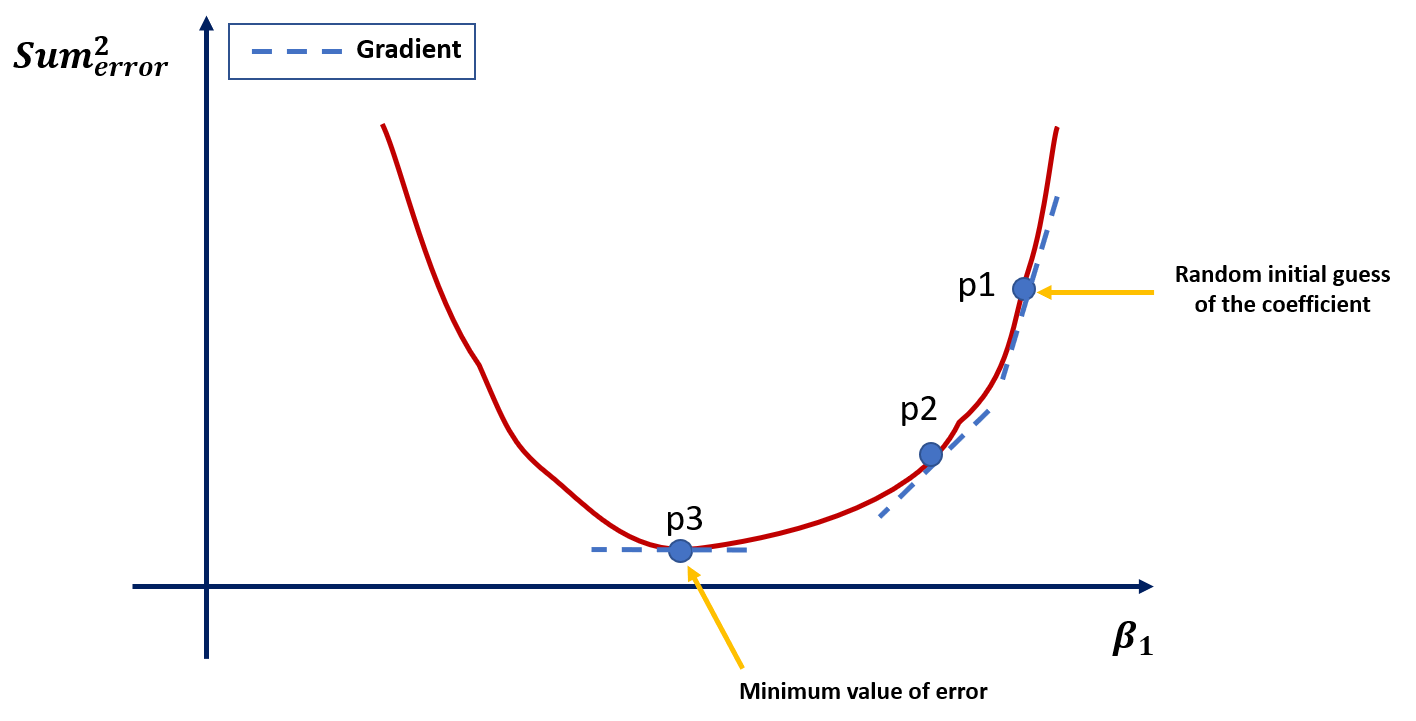

In [6]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\gradient_descent.png')

### Multiple input features
So far we have been referring the simple Linear Regression formula $y = \beta_{1}x_{1} + \beta_{0}$. This equation assumes only one feature or input (i.e weight) and thus we needed to calculate only the coeffient of $\beta_{1}$ for the feature $x_{1}$ and the coefficient $\beta_{0}$ for the intercept of the equation. The equation can be extended to include multiple features as follows:
\begin{equation*}
y = \beta_{1}x_{1} + \beta_{2}x_{2}+\beta_{3}x_{3}+\beta_{4}x_{4}+\beta_{0}
\label{eq_linreg4} \tag{2}
\end{equation*}
In the equation above, we have in total four features. In case of predicting the price of a house, those features could be $x_{1}$: number of rooms, $x_{2}$: number ofbathrroms, $x_{1}$: total area,  $x_{1}$: does it have a pool or not? For those four features, the gradient descent algorithm will need to estimate the parameters $\beta_{0},\beta_{1},\beta_{2},\beta_{3},\beta_{4}$ that minimum the error of the Linear Regression.

<a id='section4'></a>

### 04. Implementation of Linear Regression in Python
To showcase what we discussed above, we will implement a Linear Regression example in Python. We will use a housing dataset that is readily available from Python libraries. We will do basic data pre processing, build the linear regression model and finally interpert the results of the model. Below is a full description of the Boston Housing dataset. 

In [7]:
#Necessary libraries for data analysis, data visualization and preprocessing
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

#Loading the housing dataset from 
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [8]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Below is a table that illustrates the Boston Housing Dataset

In [9]:
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1) #Putting data in a common dataframe
col_names = list(load_boston().feature_names) #fixing the column names
col_names.append('MEDV')
df.columns = col_names
print('The table has: ', df.shape[0],'rows and ', df.shape[1],'columns.')
print('Columns: ',list(load_boston().feature_names), 'are the input features X and MEDV is the output y.' )
df

The table has:  506 rows and  14 columns.
Columns:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] are the input features X and MEDV is the output y.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


According to what we discussed on the previous section, the Linear Regression equation for this problem would be:
$$y = \beta_{1}CRIM+\beta_{2}ZN+\beta_{3}INDUS+\beta_{4}CHAS+\beta_{5}NOX+\beta_{6}RM+\beta_{7}AGE+\beta_{8}DIS+\beta_{9}RAD+\beta_{10}TAX+\beta_{11}PTRATIO+\beta_{12}B+\beta_{13}LSTAT+\beta_{0} $$
That means that we need to estimate 14 coefficients that would yield a linear regression model that minimizes the regression error.

From the first figure, we see that we need two sets of data. The first set is needed to train the model and find the linear regression coefficients. The second set is needed to make predictions based on the model we created from the training procedure. We will use a built in python module to split the data between training and test set. The built in function 'train_test_split' shuffles the original data and then splits the into training and test set. We choose to use $80\%$ of the data for training the model and $20\%$ for testiing.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=5)

print('After the split, the training set has:',X_train.shape[0],'rows')
print('After the split, the training set has:',X_test.shape[0],'rows')
pd.DataFrame(X_train, columns=load_boston().feature_names)

After the split, the training set has: 379 rows
After the split, the training set has: 127 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
1,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
2,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
3,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
4,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
375,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
376,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
377,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97


When we look at the data, we see that they are very different from each other. Fro example, the column 'NOX' takes values between  $[0,1]$ whilst column 'TAX' takes values between $[200,700]$. If we try to fit a model without preprocessing the data, the Linear Regression model will give more importance to the column that has high values. In order to eliminate this issue, we use a technique called standardization. With scaling, we aim to bring all the features in the data set in a comparable format. Comparable format means that after scaling, all the features we have values between $-1,1$ and therefore the linear regression model will give the same importance to all the 13 features. It is common practice to use the StandardScaler to fit the training set and then use the same to transform the test set.


In [11]:
from sklearn.preprocessing import  StandardScaler
#Scaler for the the training and test features
xscaler =StandardScaler()
xscaler = xscaler.fit(X_train)

X_train_scaled = xscaler.transform(X_train)
X_test_scaled = xscaler.transform(X_test)

#Scaler for the the training and test target
yscaler = StandardScaler()
yscaler = yscaler.fit(Y_train.reshape(-1,1))

Y_train_scaled =yscaler.transform(Y_train.reshape(-1,1))
Y_test_scaled = yscaler.transform(Y_test.reshape(-1,1))

In [12]:
print('After standardizing the data, the dataframe look likes follows')
pd.DataFrame(X_train_scaled, columns=load_boston().feature_names)

After standardizing the data, the dataframe look likes follows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.412133,-0.501639,0.434859,3.610684,-0.018412,-0.495117,0.920476,-0.449527,-0.526748,-0.778829,-0.937793,0.428149,0.766765
1,-0.407195,-0.501639,-0.140363,-0.276956,-0.044620,-0.394257,0.526391,-0.518796,-0.411617,0.150241,-0.293660,0.401392,-0.307077
2,-0.424005,2.972481,-1.556181,-0.276956,-1.136600,2.277104,-1.254030,0.897338,-0.641879,-0.903896,-1.857983,0.398257,-1.340051
3,-0.200975,-0.501639,1.278419,3.610684,0.462059,2.171921,1.075296,-0.863774,-0.526748,-0.022471,-1.719954,0.346533,-1.488022
4,-0.411696,-0.501639,0.434859,3.610684,-0.018412,0.112927,0.871216,-0.218142,-0.526748,-0.778829,-0.937793,0.392771,-0.278892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.271807,-0.501639,1.059005,-0.276956,0.269871,-0.260256,0.427870,-0.129005,1.660744,1.543845,0.810569,0.380904,0.352448
375,-0.415440,1.452553,-1.114386,-0.276956,-1.005562,1.282908,-1.011246,0.369302,-0.526748,-0.052249,-1.489907,0.428149,-0.999015
376,-0.403763,-0.501639,-0.187804,-0.276956,0.287342,-0.900000,-1.366626,-0.493802,-0.411617,-0.093938,0.350473,0.387733,0.721669
377,-0.397550,-0.501639,-0.054376,-0.276956,-0.551298,0.045207,-0.532713,0.265911,-0.641879,-0.772873,0.074416,0.405422,-0.212658


<a id='section5'></a>

### 05. Fitting the Linear Regression model

In [13]:
#Importing Plotting libraries
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression() #Creating a linear Regression Model
lin_model.fit(X_train_scaled, Y_train_scaled) #Fitting the linear regresion model to the scaled data. Under the hood it performs gradient descent

train_preds = yscaler.inverse_transform(lin_model.predict(X_train_scaled))
test_preds = yscaler.inverse_transform(lin_model.predict(X_test_scaled))

trainMSE =  mean_squared_error(Y_train, train_preds.reshape(-1,1), squared=True)
testMSE = mean_squared_error(Y_test, test_preds.reshape(-1,1), squared =True)

r2_train = r2_score(Y_train, train_preds)
r2_test = r2_score(Y_test, test_preds)

In [15]:
# model evaluation for training set

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(trainMSE))
print('R2 score is {}'.format(r2_train))
print("\n")

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(testMSE))
print('R2 score is {}'.format(r2_test))


The model performance for training set
--------------------------------------
MSE is 21.514174022233703
R2 score is 0.7468034208269784


The model performance for testing set
--------------------------------------
MSE is 24.27460831168786
R2 score is 0.705909607109805


Above, we have printed two metrics. The first one is the MSE or Mean Squared Error (MSE). The MSE defines the average error of the model. That is, the sum of the squared error of all the data points, over the number of data points. The $R^{2}$ is a measure of goodness of fit. This measure determines how well does the input features descibe the target variable.  In the figure below, we illustrate the R2 for the training and test data set. High values of R2 indicate a good fit of the regression line to that data, whilst a low value of the R2 suggests not a good fit. Visually, we can identify if we have a good fit when the plot of the predicted against the actual values resemble a straight line. If the dots in the plot look like a random cloud then we can assume that the fit of the data is not good. In the plot below, we see that the training data lies somewhere in between a trasught line and a random cloud which is also something that is illustrated by by the $R^{2} = 0.747$

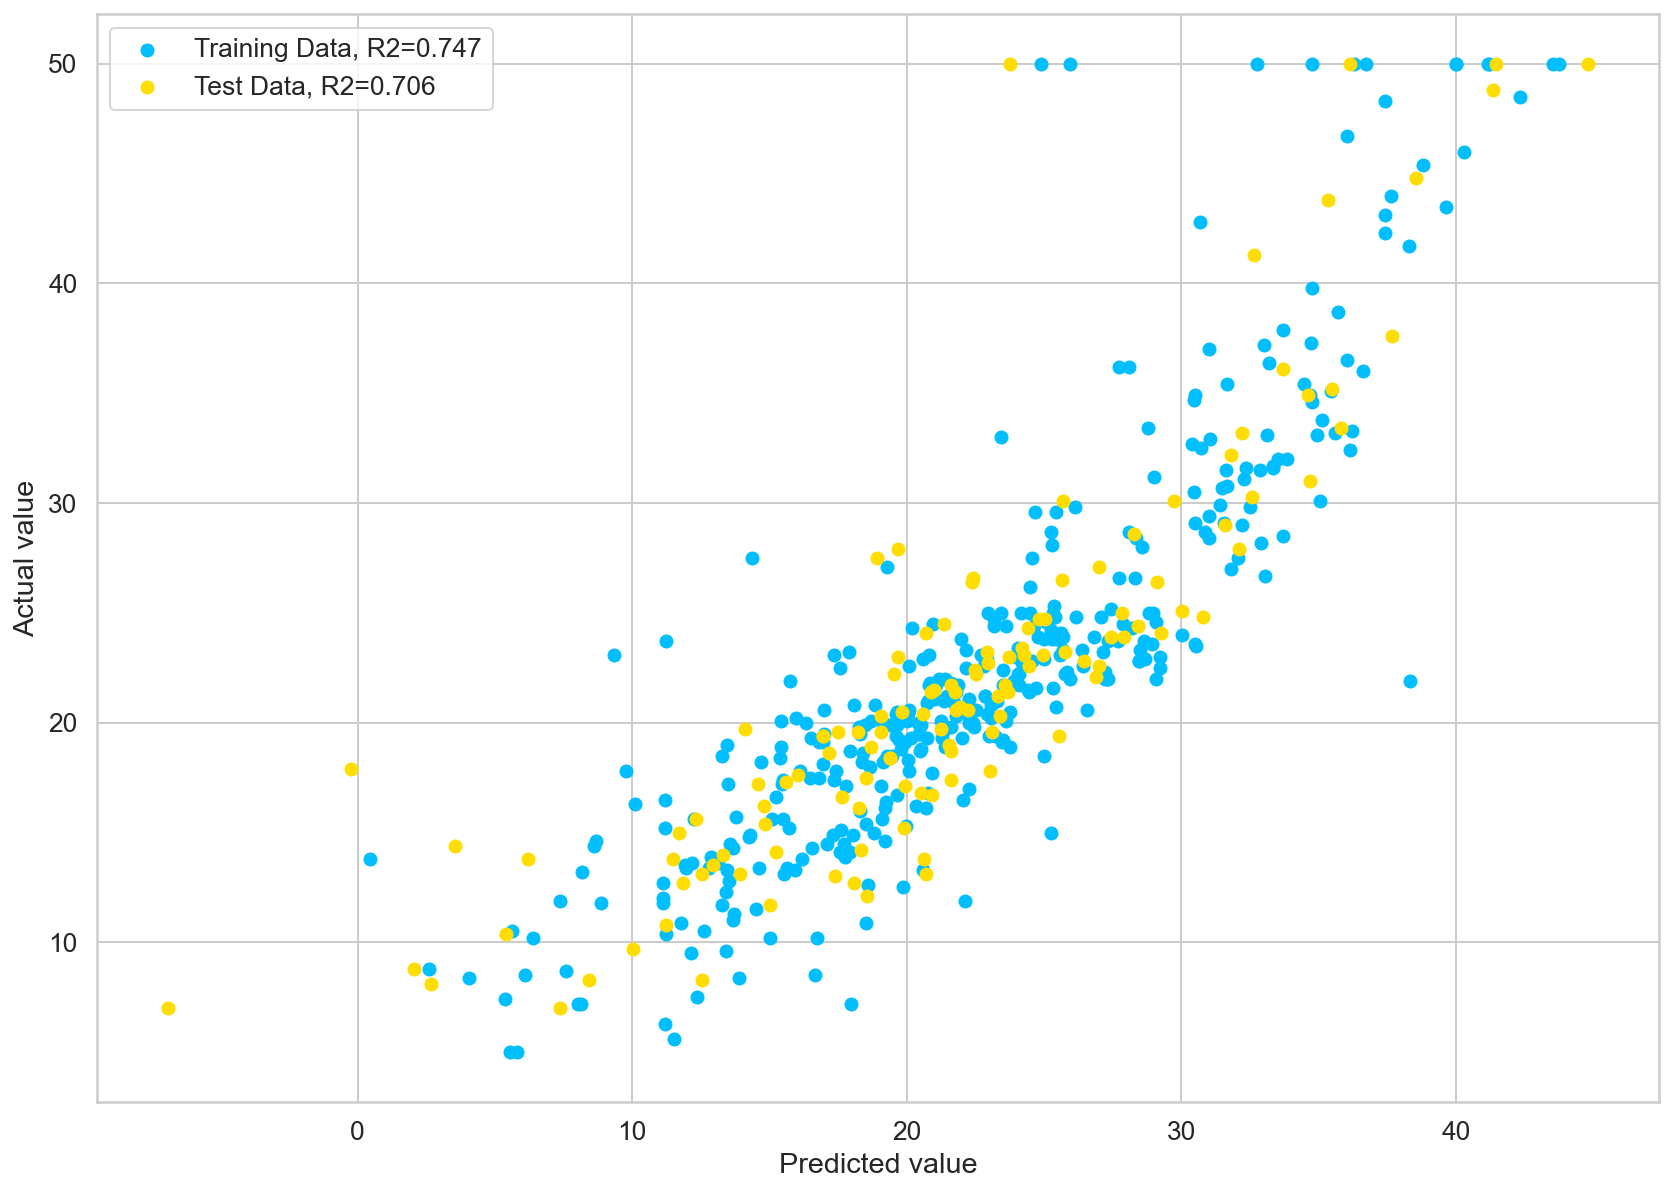

In [16]:
plt.scatter(train_preds, Y_train, label = 'Training Data' + ', R2='+str(round(r2_train,3)))
plt.scatter(test_preds, Y_test, label = 'Test Data'+ ', R2='+str(round(r2_test,3)))
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.legend()
plt.show()

The figure below gives a more intutitive understanding for the interpretation of the R2. The key takeaway is that the closer the data points resembles a straight line, the better the model is. 

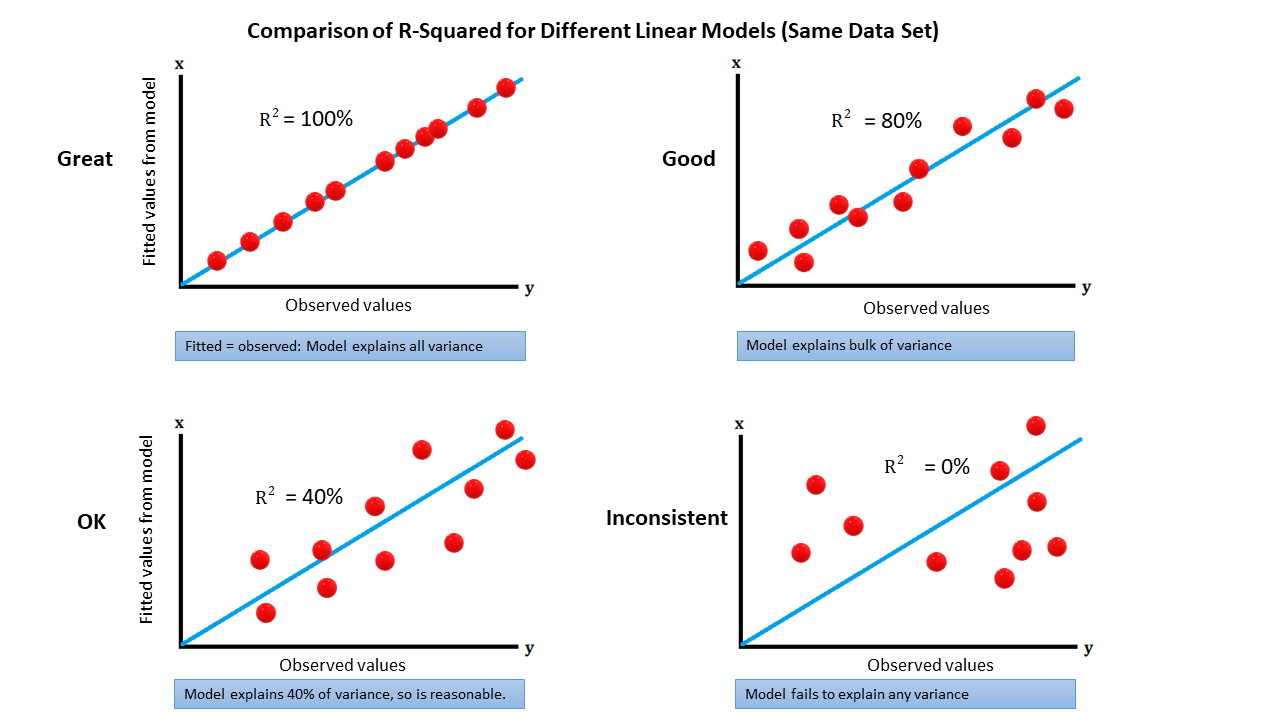

In [17]:
Image(filename='C:\\Users\\geosa\\OneDrive - ROCKWOOL Group\\Desktop\\r2.png')

<a id='section6'></a>

### 06. Interpretation of the results

We can now also see some interesting statistics from the Linear Regression model we just created. From the below summary of the model we focus only on the columns referred as  'coef' and $P>t$. The 'coef' column referes to the $\beta$ coefficients of the features. The second column is a statistcial measure that gives an indication of the importance of the features in the model. To begin with the first column, we see that $\beta_{0} \approx 0$. $\beta_{0}$ is the intercept of the model. We need to be careful since what we see below are the variables of the model with the standardized data. The coefficients for the standardized data are not easily interpretable and therefore we will proceed to illustrate the procedure of de-standardizing the coefficients. As a note, there is a built in function in Python that lets you de-standaridze your prediction without any manual work. When we report the MSE and $R^{2}$ above we have used the de stadaridzed predictions. 

In [18]:
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X_train_scaled2 = pd.DataFrame(X_train_scaled)
X_train_scaled2 = sm.add_constant(X_train_scaled2)
new_names = list(load_boston().feature_names)
new_names.insert(0, "beta_0")
                 
X_train_scaled2.columns = new_names
est = sm.OLS(Y_train_scaled, X_train_scaled2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     82.81
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          2.87e-100
Time:                        12:48:14   Log-Likelihood:                -277.48
No. Observations:                 379   AIC:                             583.0
Df Residuals:                     365   BIC:                             638.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta_0      3.745e-15      0.026   1.42e-13      1.0

The coefficients that are presented in the table above are the ones for the standardized features. Those features are standardized to have $mean = 0$ and $std=1$. However, in order to try and make the coefficients a bit more inteepretable, we will scale them back. We assume that the normalized coefficients are defined as $(\acute\beta_{0},\acute\beta_{1},\acute\beta_{2})$ and the original coefficients can be defines as $(\beta_{0},\beta_{1},\beta_{2})$. The standardized prediction is given by: $$\acute{y} =\acute\beta_{2}\acute{x_{2}}+\acute\beta_{1}\acute{x_{1}} + \acute\beta_{0}$$. By reversing the steps of the standardization then we obtain: $$\frac{y-\mu Y}{\sigma Y} = \acute\beta_{2}\frac{x_{2}-\mu X_{2}}{\sigma X_{2}} +\acute\beta_{1}\frac{x_{1}-\mu X_{1}}{\sigma X_{1}} + \acute\beta_{0} $$
By isolating $y$ we will then obtain:
$$y = \overbrace{\left(\frac{\sigma Y}{\sigma X_{2}}\acute\beta_{2}\right)}^{\beta_{2}}x_{2} +\overbrace{\left(\frac{\sigma Y}{\sigma X_{1}}\acute\beta_{1}\right)}^{\beta_{1}}x_{1} -\overbrace{\sigma Y\left(-\acute\beta_{2}\frac{\mu X_{2}}{\sigma X_{2}}  -\acute\beta_{1}\frac{\mu X_{1}}{\sigma X_{1}} +\acute\beta_{0}  \right)+\mu Y}^{\beta_{0}}$$
In the scale Object that we have created, we can extract all this information and perform tha calculations to de-standardize the coefficients. Below is a summary of a linear regression where we have not standardized the data before before fitting the linear model. This will used to compare the validity of destandardization process. 


In [19]:
X_train_ = pd.DataFrame(X_train)
X_train_ = sm.add_constant(X_train_)
new_names = list(load_boston().feature_names)
new_names.insert(0, "beta_0")
                 
X_train_.columns = new_names
est = sm.OLS(Y_train, X_train_)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     82.81
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          2.87e-100
Time:                        12:48:14   Log-Likelihood:                -1119.3
No. Observations:                 379   AIC:                             2267.
Df Residuals:                     365   BIC:                             2322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta_0        32.2141      5.893      5.466      0.0

In [20]:
coefficients =lin_model.coef_/xscaler.scale_*yscaler.scale_
intercept = yscaler.scale_[0]*(np.sum(-lin_model.coef_*(xscaler.mean_/xscaler.scale_))+lin_model.intercept_)+yscaler.mean_
print('The de-standardized intercept is: ', intercept)
print('The de-standardized coefficients are: ',coefficients)

The de-standardized intercept is:  [32.21412039]
The de-standardized coefficients are:  [[-1.53004848e-01  4.79388437e-02 -8.60131597e-03  2.57986675e+00
  -1.46325645e+01  3.96283436e+00 -7.92357629e-03 -1.46078023e+00
   3.45431204e-01 -1.24503134e-02 -9.19092768e-01  1.32203623e-02
  -5.17255347e-01]]


In [21]:
p_vals = est2.pvalues.to_frame('p_values').reset_index()
 
coeff = pd.concat([pd.DataFrame(load_boston().feature_names),pd.DataFrame(coefficients).transpose()], axis=1)
coeff.columns = ['Features', 'estimatedCoeffs']
coeff

coeff.loc[-1] = ['beta_0',float(intercept) ]  # adding a row
coeff.index = coeff.index + 1  # shifting index
coeff = coeff.sort_index()

coeff = pd.merge(left = p_vals, right = coeff, left_on = 'index', right_on = 'Features', how = 'inner')
coeff = coeff.drop(columns = ['index'])

# shift column 'C' to first position
first_column= coeff.pop('Features')
  
# insert column using insert(position,column_name,first_column) function
coeff.insert(0, 'Features', first_column)
coeff.p_values = np.round(coeff.p_values,3)
coeff

,Features,p_values,estimatedCoeffs
0,beta_0,0.000,32.214120
1,CRIM,0.000,-0.153005
2,ZN,0.003,0.047939
3,INDUS,0.904,-0.008601
4,CHAS,0.009,2.579867
5,NOX,0.001,-14.632565
6,RM,0.000,3.962834
7,AGE,0.592,-0.007924
8,DIS,0.000,-1.460780
9,RAD,0.000,0.345431


The above table illustrates the features of the model their p-values and the estimated coefficients. In plain english, a p-value is a measure that suggests whether a feature is a meaningful addition to the model. 'Meaningful' could mean whether this specific feature is adding some predictive power in the model or it works as a noise or its impact is small. The threshold for distinguishing between meaningful and not meaningful is usually set to $0.05$.In the table above, we see that feature 'INDUS' and 'AGE' has a $p-value>0.05$ which suggests that changes in those features are not asscociated with changes in the prediction. All the rest of the features with $p-values$ smaller than $0.05$ indicates that they have an important role in the predicted outcome. We now shift our focus to the column 'estimatedCoeffs'. $\beta_{0}$ is the intercept of the model and it takes the value of $32.21$. That means, that if all predictors take the value of zero, then the model will give a constant predicted value of $32.21$. Now we move to the rest of the features. For starters, the sign of the coefficients suggests whether whether there is a postive or negative corellation between the feature (Independent variable) and the predcted value(dependent variable). That is, a postive coefficient indicates that as the value of the independent variable increases, the dependent variable also increases. The opposite is valid for the negative coefficients. Let us take as an example the variable RM. The description of the variable RM 'average number of rooms per dwelling' and the coefficient has value $3.96$. That means, having all the rest of the variables are kept constant, an increase in the number of dwelling room by 1 (1 extra room), the median value of the porperty will increase by $3.96$.